In [2]:
# Import neccasary libraries
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import os
#os.chdir(path)
#os.getcwd()

In [3]:
%matplotlib inline
np.random.seed(0)

def gen_data(file,normalization):
    train_data=pd.read_csv(file)
    train_data=train_data.drop('dummy',1)
    train_data=train_data.drop('id',1)
    day=list()
    month=list()
    year=list()
    for item in train_data['date']:
        day.append(item.split('/')[1])
        month.append(item.split('/')[0])
        year.append(item.split('/')[2])
    day=np.asarray(day).astype(int)
    month=np.asarray(month).astype(int)
    year=np.asarray(year).astype(int)
    train_data.insert(loc=0, column='year', value=year)
    train_data.insert(loc=0, column='month', value=month)
    train_data.insert(loc=0, column='day', value=day)
    train_data=train_data.drop('date',1)
    train_data.head()
    x_train = train_data.drop('price', 1)
    y_train = train_data['price']
    #Normlization
    if normalization==True:
        x_train = (x_train - x_train.mean()) / (x_train.max() - x_train.min())
    else:
        action='Do nothing'
    # add the bias column
    ones = np.ones(x_train.shape[0])
    x_train.insert(loc=0, column='Intercept', value=ones)
    return x_train,y_train

def gen_test_data(file,normalization):
    train_data=pd.read_csv(file)
    train_data=train_data.drop('dummy',1)
    train_data=train_data.drop('id',1)
    day=list()
    month=list()
    year=list()
    for item in train_data['date']:
        day.append(item.split('/')[1])
        month.append(item.split('/')[0])
        year.append(item.split('/')[2])
    day=np.asarray(day).astype(int)
    month=np.asarray(month).astype(int)
    year=np.asarray(year).astype(int)
    train_data.insert(loc=0, column='year', value=year)
    train_data.insert(loc=0, column='month', value=month)
    train_data.insert(loc=0, column='day', value=day)
    train_data=train_data.drop('date',1)
    train_data.head()
    x_train = train_data
    #Normlization
    if normalization==True:
        x_train = (x_train - x_train.mean()) / (x_train.max() - x_train.min())
    else:
        action='Do nothing'
    # add the bias column
    ones = np.ones(x_train.shape[0])
    x_train.insert(loc=0, column='Intercept', value=ones)
    return x_train

def solve_lr(x_train,y_train,alpha,n_epoch):
    # Option 1 --> set w as random values between 0 and 1
    w=np.random.rand(x_train.shape[1])
    # Option 2 --> set w as zero
    #w=np.zeros(x_train.shape[1])

    w=np.matrix(w).T
    X=np.matrix(x_train)
    y=np.matrix(y_train)
    grad_norm=10000
    counters = list()
    sse_s = list()
    counter=0
    while grad_norm>0.01:
        e=X*w-y.T
        grad=X.T*e/X.shape[0]
        # case 1 separate w0 and other w terms
        #w[0] = w[0] - alpha * e[0]
        #w[1:] = w[1:] - alpha * grad[1:]
        # case to follow the same implementation for all w terms
        w = w - alpha * grad
        e=X*w-y.T
        sse=np.dot(e.T,e)[0,0]/X.shape[0]
        grad_norm=np.square(grad.T*grad)[0,0]
        #print(0.5*sse)
        counter+=1
        counters.append(counter)
        sse_s.append(0.5*sse)
        if counter >= n_epoch:
            print('maximum iteration limit reached!')
            break
    return w,counters,sse_s
def solve_lrn(x_train,y_train,alpha,landa,n_epoch):
    # Option 1 --> set w as random values between 0 and 1
    w=np.random.rand(x_train.shape[1])
    # Option 2 --> set w as zero
    #w=np.zeros(x_train.shape[1])

    w=np.matrix(w).T
    X=np.matrix(x_train)
    y=np.matrix(y_train)
    grad_norm=1000
    counters = list()
    sse_s = list()
    counter=0
    while grad_norm>0.01:
        e=X*w-y.T
        grad=X.T*e/X.shape[0]
        # case 1 separate w0 and other w terms
        w[0] = w[0] - alpha * grad[0]
        w[1:] = w[1:] - alpha * grad[1:]+landa/X.shape[0]*w[1:]
        e=X*w-y.T
        sse=np.dot(e.T,e)[0,0]/X.shape[0]
        grad_norm=np.square(grad.T*grad)[0,0]
        #print(0.5*sse)
        counter+=1
        counters.append(counter)
        sse_s.append(0.5*sse)
        if counter  >= n_epoch:
            print('maximum iteration limit reached!')
            break
    return w,counters,sse_s
def test(w,x_train,y_train):
    X=np.matrix(x_train)
    y=np.matrix(y_train)
    e=X*w-y.T
    sse=np.dot(e.T,e)[0,0]/X.shape[0]
    return sse
def predict(w,x_test):
    X=np.matrix(x_test)
    y=X*w
    return y

In [4]:
# ========== Part 0.(a) ================
train_data=pd.read_csv("PA1_train.csv")
train_data=train_data.drop('dummy',1)
train_data=train_data.drop('id',1)

In [5]:
# ========== Part 0.(b) ================
day=list()
month=list()
year=list()
for item in train_data['date']:
    day.append(item.split('/')[1])
    month.append(item.split('/')[0])
    year.append(item.split('/')[2])
day=np.asarray(day).astype(int)
month=np.asarray(month).astype(int)
year=np.asarray(year).astype(int)
train_data.insert(loc=0, column='year', value=year)
train_data.insert(loc=0, column='month', value=month)
train_data.insert(loc=0, column='day', value=day)
train_data=train_data.drop('date',1)
train_data.head()

,day,month,year,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,9,7,2014,4,2.50,2720,10006,2.0,0,0,...,2720,0,1989,0,98074,47.6295,-122.042,2720,10759,5.9495
1,18,7,2014,2,2.50,2600,5000,1.0,0,0,...,1300,1300,1926,0,98126,47.5806,-122.379,2260,5000,6.6500
2,7,7,2014,5,1.75,1650,3000,1.5,0,0,...,1650,0,1902,0,98144,47.5955,-122.306,1740,4000,4.4300
3,28,4,2015,4,1.75,1720,9600,1.0,0,0,...,1720,0,1969,0,98059,47.4764,-122.155,1660,10720,3.8000
4,4,9,2014,6,2.25,3830,11180,1.0,0,2,...,2440,1390,1962,0,98008,47.5849,-122.113,2500,10400,8.8700


In [6]:
# ========== Part 0.(c) ================
print("Category proportions for categorical columns \n")
categs=['waterfront','view','condition','grade']
for item in categs:
    print(train_data.groupby(item).agg({'price':'count'})/train_data.shape[0]*100)
print("\nStandard deviation for numerical columns \n")
print(train_data.std().drop(categs,0))
print("\nMean for numerical columns \n")
print(train_data.mean().drop(categs,0))
range_col=train_data.max()-train_data.min()
print("\nRange for numerical columns \n")
print(range_col.astype(float).drop(categs,0))

Category proportions for categorical columns 

            price
waterfront       
0            99.3
1             0.7
      price
view       
0     90.30
1      1.62
2      4.25
3      2.50
4      1.33
           price
condition       
1           0.13
2           0.76
3          65.30
4          25.69
5           8.12
       price
grade       
4       0.11
5       1.05
6       9.33
7      41.30
8      28.38
9      11.82
10      5.47
11      2.10
12      0.39
13      0.05

Standard deviation for numerical columns 

day                  8.621761
month                3.111435
year                 0.465918
bedrooms             0.943246
bathrooms            0.765128
sqft_living        911.334358
sqft_lot         41203.894918
floors               0.542647
sqft_above         830.865434
sqft_basement      435.005264
yr_built            29.480594
yr_renovated       394.379804
zipcode             53.518391
lat                  0.138651
long                 0.141405
sqft_living15      691.90030

Text(0,0.5,'price')

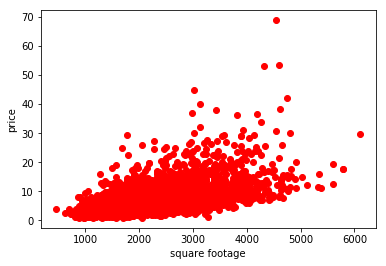

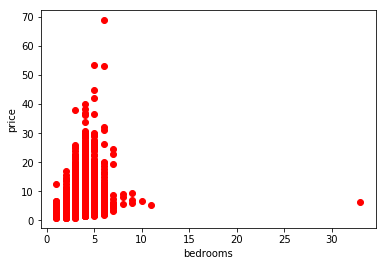

In [7]:
# ========== Part 0.(d) ================
plt.figure(0)
plt.plot(train_data['sqft_living15'],train_data['price'],'ro')
plt.xlabel('square footage')
plt.ylabel('price')
plt.figure(1)
plt.plot(train_data['bedrooms'],train_data['price'],'ro')
plt.xlabel('bedrooms')
plt.ylabel('price')

In [8]:
# ========== Part 0.(e) ================
x_train=train_data.drop('price',1)
y_train=train_data['price']
x_train=(x_train - x_train.mean()) / (x_train.max() - x_train.min())
ones=np.ones(x_train.shape[0])
x_train.insert(loc=0, column='Intercept', value=ones)
x_train.head()
w=np.random.rand(x_train.shape[1])


Part 1 -------------------
maximum iteration limit reached!
maximum iteration limit reached!
maximum iteration limit reached!
maximum iteration limit reached!
maximum iteration limit reached!


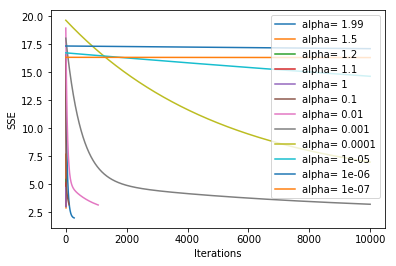

In [9]:
print('Part 1 -------------------')
# ============= Part 1.a =======================s
#alphas=[3,2,1.99,1.5,1.2,1.1,1,0.1,1e-2,1e-3,1e-4,1e-5,1e-6,1e-7]
alphas=[1.99,1.5,1.2,1.1,1,0.1,1e-2,1e-3,1e-4,1e-5,1e-6,1e-7]


plt.figure(3)
for a in alphas:
    results = solve_lr(x_train, y_train, alpha=a,n_epoch=10000)
    plt.xlabel('Iterations')
    plt.ylabel('SSE')
    plt.plot(results[1],results[2])
plt.legend(['alpha= {}'.format(x) for x in alphas], loc='upper right')
plt.show()

In [10]:
# ============= Part 1.b =======================s
data=gen_data("PA1_dev.csv",normalization=True)
x_cross=data[0]
y_cross=data[1]
training_sse=list()
dev_sse=list()
for a in alphas:
    results = solve_lr(x_train, y_train, alpha=a,n_epoch=10000)
    w=results[0]
    sse=test(w,x_cross,y_cross)
    dev_sse.append(sse)
    training_sse.append(results[2][-1])
print('training sse for all the alpha values are:\n {}:\n'.format(training_sse))
print('dev sse for all the alpha values are:\n {}:\n'.format(dev_sse))
plt.figure(5)
plt.xlabel('alpha')
plt.ylabel('SSE')
plt.plot(alphas,dev_sse)
plt.plot(alphas,training_sse)
plt.legend(['Validation SSE','Training SSE'], loc='upper right')
plt.show()

IOError: File PA1_dev.csv does not exist

In [ ]:
# ============= Part 1.c =======================s
results = solve_lr(x_train, y_train, alpha=1.99,n_epoch=10000)    # compare the weights with alpha=1, there is no negative weight when alpha =1 which makes more sense in terms of interpretation.
w=results[0]
weight_df=pd.DataFrame([train_data._info_axis[:-1],w[1:]],index=['Feature','Weight'])   # w[1:] because the first item in w is the bias term ---  train-data._info_axis[:-1] because the last column there is the price.
print(results[2][-1])
print(weight_df)



In [ ]:
# ============= Part 2.a =======================s

landas=[0,1e-3,1e-2,1e-1,1,10,100]
plt.figure(5)
for l in landas:
    results = solve_lrn(x_train, y_train, alpha=1,landa=l,n_epoch=10000)
    plt.xlabel('Iterations')
    plt.ylabel('SSE')
    plt.plot(results[1],results[2])
plt.legend(['Landa= {}'.format(x) for x in landas], loc='upper right')
plt.show()


training_sse=list()
dev_sse=list()
for l in landas:
    results = solve_lrn(x_train, y_train, alpha=1,landa=l,n_epoch=10000)
    w=results[0]
    sse=test(w,x_cross,y_cross)
    dev_sse.append(sse)
    training_sse.append(results[2][-1])
print('training sse for all the landa values are:\n {}:\n'.format(training_sse))
print('dev sse for all the landa values are:\n {}:\n'.format(dev_sse))
plt.figure(6)
plt.xlabel('landa')
plt.ylabel('SSE')
plt.plot(landas,dev_sse)
plt.plot(landas,training_sse)
plt.legend(['Validation SSE','Training SSE'], loc='upper right')
plt.show()

In [ ]:
a=np.arange(5)
print('if a is an ndarray')
print('shape of a is {}'.format(a.shape))
print('a is {}'.format(a))
print('np.dot(a.T,a) is {}'.format(np.dot(a,a.T)))
print('a.T*a is {}'.format(a*a.T))
a=np.asmatrix(a)
print('\nif a is matrix')
print('shape of a is {}'.format(a.shape))
print('a is {}'.format(a))
print('np.dot(a.T,a) is {}'.format(np.dot(a,a.T)))
print('a.T*a is {}'.format(a*a.T))



C:\Users\estajim.ONID\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:58: RuntimeWarning: overflow encountered in square
C:\Users\estajim.ONID\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in subtract


maximum iteration limit reached!
maximum iteration limit reached!
training sse for all the alpha values are:
 [nan, nan, nan, nan, 2663763115.833302, 2777627094.313352]:

dev sse for all the alpha values are:
 [nan, nan, nan, nan, 5327526231.666604, 5555254188.626704]:



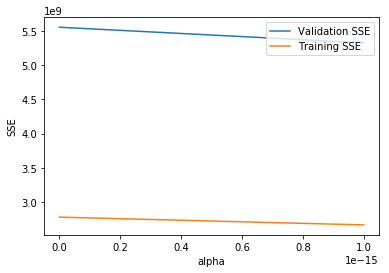

In [133]:
# ============= Part 3.a =======================s
data=gen_data("PA1_train.csv",normalization=False)
x_train=data[0]
y_train=data[1]
data=gen_data("PA1_train.csv",normalization=False)
x_cross=data[0]
y_cross=data[1]
#alphas=[1,1e-3,1e-6,1e-9,1e-15,1e-30,1e-100,0]
alphas=[1,1e-3,1e-6,1e-9,1e-15,0]

training_sse=list()
dev_sse=list()
for a in alphas:
    results = solve_lr(x_train, y_train, alpha=a,n_epoch=10000)
    w=results[0]
    sse=test(w,x_cross,y_cross)
    dev_sse.append(sse)
    training_sse.append(results[2][-1])
print('training sse for all the alpha values are:\n {}:\n'.format(training_sse))
print('dev sse for all the alpha values are:\n {}:\n'.format(dev_sse))
plt.figure(5)
plt.xlabel('alpha')
plt.ylabel('SSE')
plt.plot(alphas,dev_sse)
plt.plot(alphas,training_sse)
plt.legend(['Validation SSE','Training SSE'], loc='upper right')
plt.show()


In [144]:
# Predictions:
x_test=gen_test_data("PA1_test.csv",normalization=True)
results = solve_lrn(x_train, y_train, alpha=1.9,landa=0,n_epoch=10000)
w=results[0]
y_test=predict(w,x_test)
y_test=np.squeeze(np.asarray(y_test))
y_test
np.savetxt("Predicted_y.csv", y_test, delimiter=",")
print(w)

[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]


C:\Users\estajim.ONID\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:118: RuntimeWarning: overflow encountered in square
